In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [2]:
data_folder = r"E:\data\gst-0815-23\Pre-Test\LessIsEnough_3"
agent_num_list = np.arange(10, 210, step=10, dtype=int).tolist()
gg_fitness_across_K_size, gg_best_across_K_size, gg_variance_across_K_size, gg_diversity_across_K_size = [], [], [], []
gs_fitness_across_K_size, gs_best_across_K_size, gs_variance_across_K_size, gs_diversity_across_K_size = [], [], [], []
ss_fitness_across_K_size, ss_best_across_K_size, ss_variance_across_K_size, ss_diversity_across_K_size = [], [], [], []
sg_fitness_across_K_size, sg_best_across_K_size, sg_variance_across_K_size, sg_diversity_across_K_size = [], [], [], []
for agent_num in agent_num_list:
    gg_performance_file = data_folder + r"\gg_performance_across_K_size_{0}".format(agent_num)
    gg_best_performance_file = data_folder + r"\gg_best_performance_across_K_size_{0}".format(agent_num)
    gg_diversity_file = data_folder + r"\gg_diversity_across_K_size_{0}".format(agent_num)
    gg_variance_file = data_folder + r"\gg_variance_across_K_size_{0}".format(agent_num)

    gs_performance_file = data_folder + r"\gs_performance_across_K_size_{0}".format(agent_num)
    gs_best_performance_file = data_folder + r"\gs_best_performance_across_K_size_{0}".format(agent_num)
    gs_diversity_file = data_folder + r"\gs_diversity_across_K_size_{0}".format(agent_num)
    gs_variance_file = data_folder + r"\gs_variance_across_K_size_{0}".format(agent_num)
    
    ss_performance_file = data_folder + r"\ss_performance_across_K_size_{0}".format(agent_num)
    ss_best_performance_file = data_folder + r"\ss_best_performance_across_K_size_{0}".format(agent_num)
    ss_diversity_file = data_folder + r"\ss_diversity_across_K_size_{0}".format(agent_num)
    ss_variance_file = data_folder + r"\ss_variance_across_K_size_{0}".format(agent_num)
    
    sg_performance_file = data_folder + r"\sg_performance_across_K_size_{0}".format(agent_num)
    sg_best_performance_file = data_folder + r"\sg_best_performance_across_K_size_{0}".format(agent_num)
    sg_diversity_file = data_folder + r"\sg_diversity_across_K_size_{0}".format(agent_num)
    sg_variance_file = data_folder + r"\sg_variance_across_K_size_{0}".format(agent_num)
    
    with open(gg_performance_file, 'rb') as infile:
        gg_fitness = pickle.load(infile)
    with open(gg_best_performance_file, 'rb') as infile:
        gg_best_performance = pickle.load(infile)
    with open(gg_variance_file, 'rb') as infile:
        gg_variance = pickle.load(infile)
    with open(gg_diversity_file, 'rb') as infile:
        gg_diversity = pickle.load(infile)

    with open(gs_performance_file, 'rb') as infile:
        gs_fitness = pickle.load(infile)
    with open(gs_best_performance_file, 'rb') as infile:
        gs_best_performance = pickle.load(infile)
    with open(gs_variance_file, 'rb') as infile:
        gs_variance = pickle.load(infile)
    with open(gs_diversity_file, 'rb') as infile:
        gs_diversity = pickle.load(infile)

    with open(ss_performance_file, 'rb') as infile:
        ss_fitness = pickle.load(infile)
    with open(ss_best_performance_file, 'rb') as infile:
        ss_best_performance = pickle.load(infile)
    with open(ss_variance_file, 'rb') as infile:
        ss_variance = pickle.load(infile)
    with open(ss_diversity_file, 'rb') as infile:
        ss_diversity = pickle.load(infile)

    with open(sg_performance_file, 'rb') as infile:
        sg_fitness = pickle.load(infile)
    with open(sg_best_performance_file, 'rb') as infile:
        sg_best_performance = pickle.load(infile)
    with open(sg_variance_file, 'rb') as infile:
        sg_variance = pickle.load(infile)
    with open(sg_diversity_file, 'rb') as infile:
        sg_diversity = pickle.load(infile)
    
    gg_fitness_across_K_size.append(gg_fitness)
    gg_best_across_K_size.append(gg_best_performance)
    gg_variance_across_K_size.append(gg_variance)
    gg_diversity_across_K_size.append(gg_diversity)
    
    gs_fitness_across_K_size.append(gs_fitness)
    gs_best_across_K_size.append(gs_best_performance)
    gs_variance_across_K_size.append(gs_variance)
    gs_diversity_across_K_size.append(gs_diversity)
    
    ss_fitness_across_K_size.append(ss_fitness)
    ss_best_across_K_size.append(ss_best_performance)
    ss_variance_across_K_size.append(ss_variance)
    ss_diversity_across_K_size.append(ss_diversity)
    
    sg_fitness_across_K_size.append(sg_fitness)
    sg_best_across_K_size.append(sg_best_performance)
    sg_variance_across_K_size.append(sg_variance)
    sg_diversity_across_K_size.append(sg_diversity)
    

In [3]:
# Baseline: independent search in reproducing parallel search
baseline_folder = r"E:\data\gst-0815-23\Pre-Test\Parallel_Search_3"
agent_num_list = np.arange(10, 210, step=10, dtype=int).tolist()
g_best_fitness_across_K_size, s_best_fitness_across_K_size = [], []
for agent_num in agent_num_list:
    g_best_performance_file = baseline_folder + r"\g_best_performance_across_K_size_{0}".format(agent_num)
    s_best_performance_file = baseline_folder + r"\s_performance_across_K_size_{0}".format(agent_num)

    with open(g_best_performance_file, 'rb') as infile:
        g_best_fitness = pickle.load(infile)
    with open(s_best_performance_file, 'rb') as infile:
        s_best_fitness = pickle.load(infile)
    
    g_best_fitness_across_K_size.append(g_best_fitness)
    s_best_fitness_across_K_size.append(s_best_fitness)


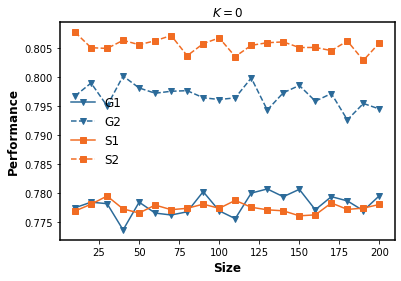

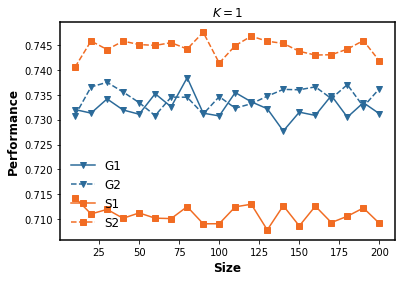

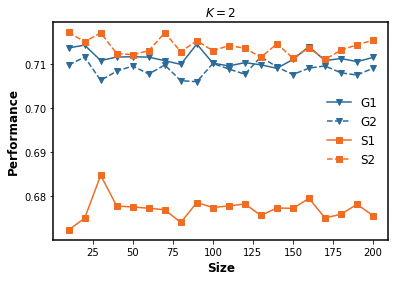

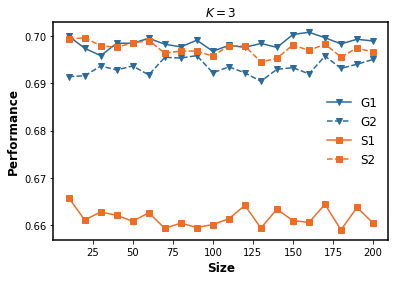

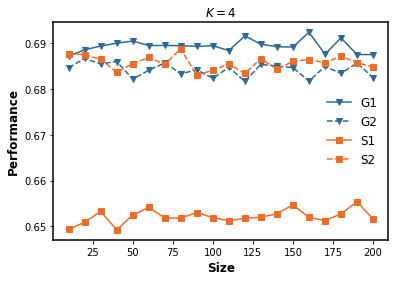

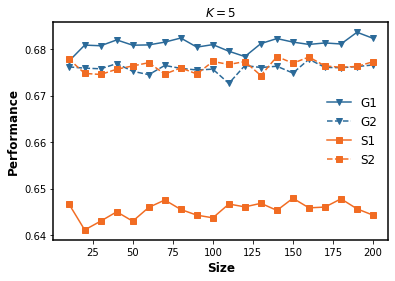

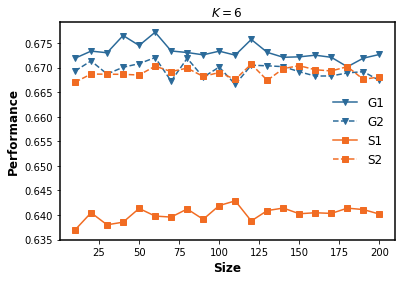

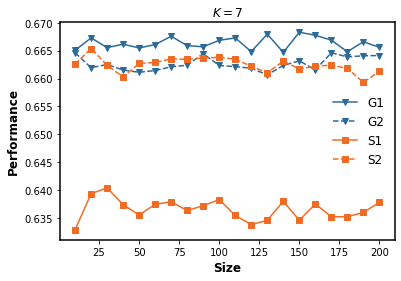

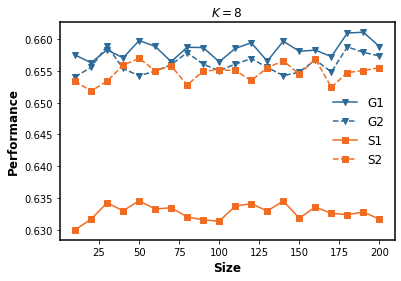

In [4]:
# GS Best Fitness Given the Same K and Varying Agent Numbers
for index in range(9):
    g1_fitness_across_size, g2_fitness_across_size = [], []
    for g1_fitness, g2_fitness in zip(gg_fitness_across_K_size, sg_fitness_across_K_size):
        g1_fitness_across_size.append(g1_fitness[index])
        g2_fitness_across_size.append(g2_fitness[index])
    
    s1_fitness_across_size, s2_fitness_across_size = [], []
    for s1_fitness, s2_fitness in zip(ss_fitness_across_K_size, gs_fitness_across_K_size):
        s1_fitness_across_size.append(s1_fitness[index])
        s2_fitness_across_size.append(s2_fitness[index])
        
    
    x = agent_num_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g1_fitness_across_size, "v-", label="G1", color=nature_blue)
    plt.plot(x, g2_fitness_across_size, "v--", label="G2", color=nature_blue)
    
    plt.plot(x, s1_fitness_across_size, "s-", label="S1", color=nature_orange)
    plt.plot(x, s2_fitness_across_size, "s--", label="S2", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_performance_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

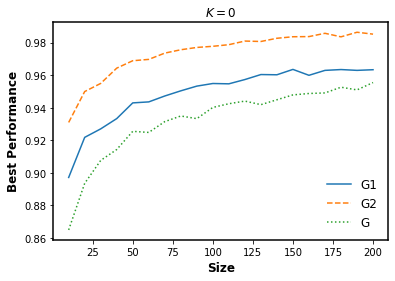

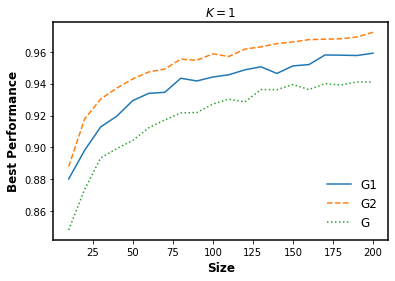

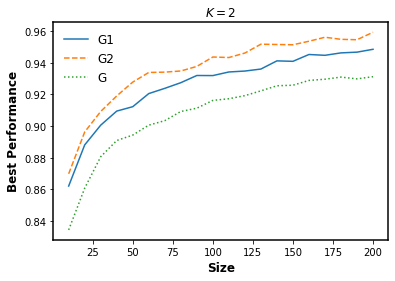

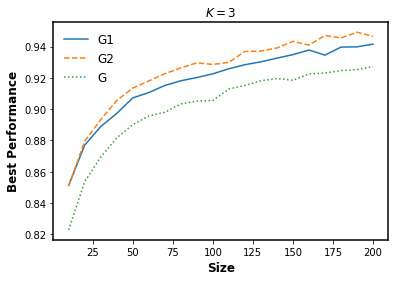

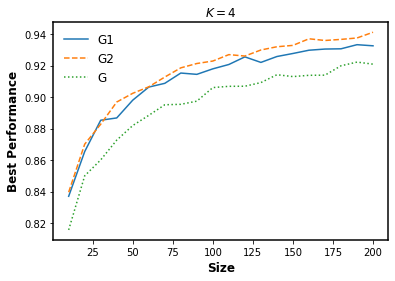

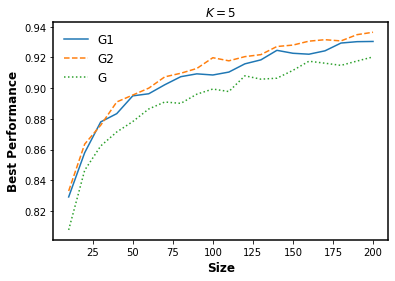

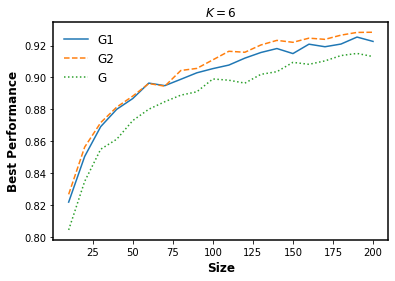

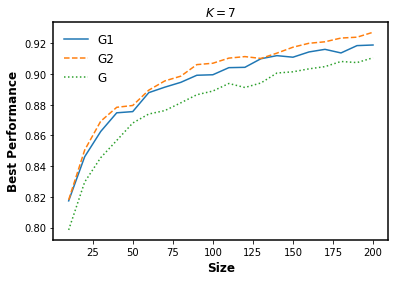

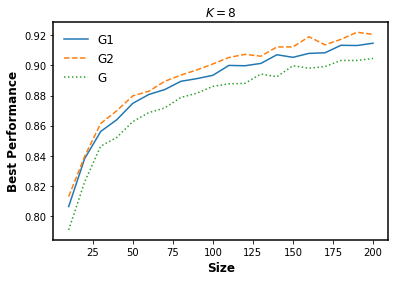

In [5]:
# Reproduce and Deviate from Parallel Search -- Generalist
for index in range(9):
    g1_fitness_across_size, g2_fitness_across_size = [], []
    for g1_fitness, g2_fitness in zip(gg_best_across_K_size, sg_best_across_K_size):
        g1_fitness_across_size.append(g1_fitness[index])
        g2_fitness_across_size.append(g2_fitness[index])
        
    g_baseline_across_size, s_baseline_across_size = [], []
    for g_fitness, s_fitness in zip(g_best_fitness_across_K_size, s_best_fitness_across_K_size):
        g_baseline_across_size.append(g_fitness[index])
        s_baseline_across_size.append(s_fitness[index])
    
    x = agent_num_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g1_fitness_across_size, "-", label="G1")
    plt.plot(x, g2_fitness_across_size, "--", label="G2")
    plt.plot(x, g_baseline_across_size, ":", label="G")
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Best Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\G_best_performance_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

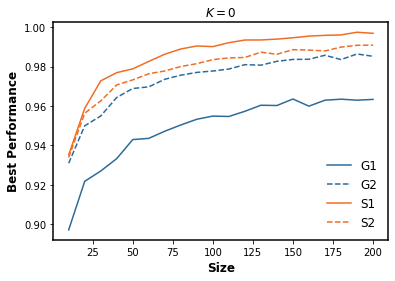

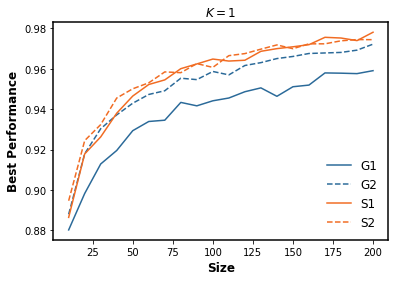

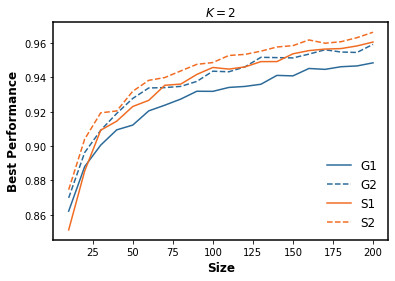

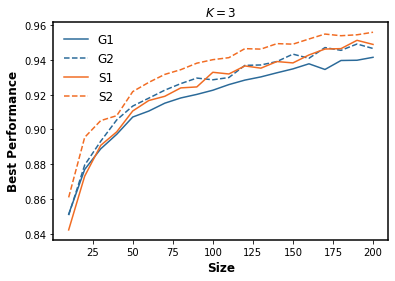

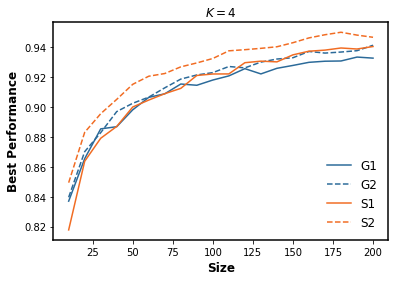

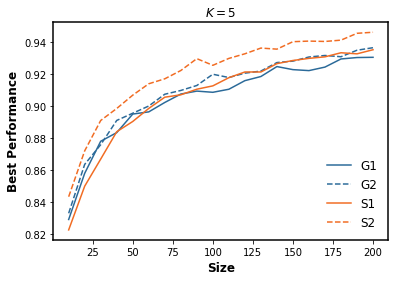

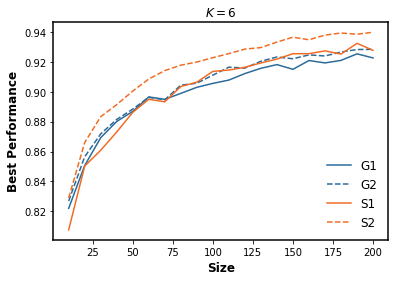

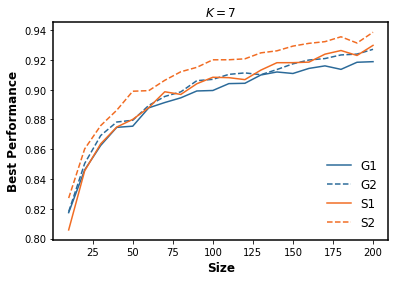

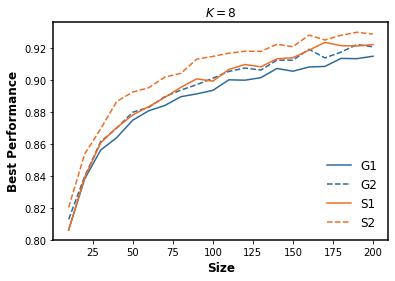

In [7]:
# GS Best Fitness Given the Same K and Varying Agent Numbers
for index in range(9):
    g1_fitness_across_size, g2_fitness_across_size = [], []
    for g1_fitness, g2_fitness in zip(gg_best_across_K_size, sg_best_across_K_size):
        g1_fitness_across_size.append(g1_fitness[index])
        g2_fitness_across_size.append(g2_fitness[index])
    
    s1_fitness_across_size, s2_fitness_across_size = [], []
    for s1_fitness, s2_fitness in zip(ss_best_across_K_size, gs_best_across_K_size):
        s1_fitness_across_size.append(s1_fitness[index])
        s2_fitness_across_size.append(s2_fitness[index])
        
    g_baseline_across_size, s_baseline_across_size = [], []
    for g_fitness, s_fitness in zip(g_best_fitness_across_K_size, s_best_fitness_across_K_size):
        g_baseline_across_size.append(g_fitness[index])
        s_baseline_across_size.append(s_fitness[index])
        
    
    x = agent_num_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g1_fitness_across_size, "-", label="G1", color=nature_blue)
    plt.plot(x, g2_fitness_across_size, "--", label="G2", color=nature_blue)
    # plt.plot(x, g_baseline_across_size, ":", label="G", color=nature_blue)
    
    
    plt.plot(x, s1_fitness_across_size, "-", label="S1", color=nature_orange)
    plt.plot(x, s2_fitness_across_size, "--", label="S2", color=nature_orange)
    # plt.plot(x, s_baseline_across_size, ":", label="S", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Best Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_best_performance_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

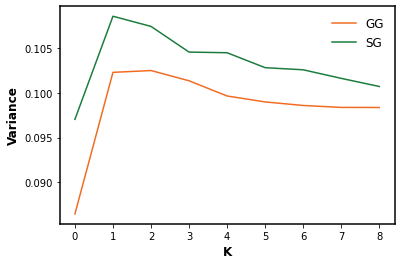

In [11]:
# GST Variance
x = range(len(gg_variance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_variance, "-", label="GG", color=nature_orange)
plt.plot(x, sg_variance, "-", label="SG", color=nature_green)
# plt.plot(x, g_variance, "k-", label="G", color=nature_blue)
# plt.plot(x, t_variance, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

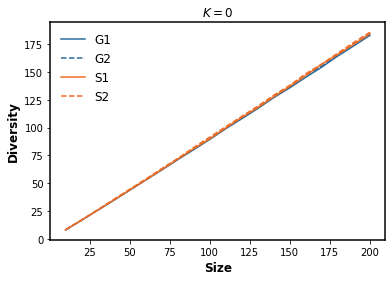

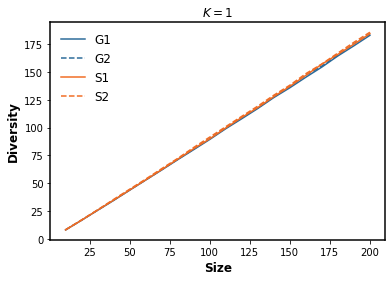

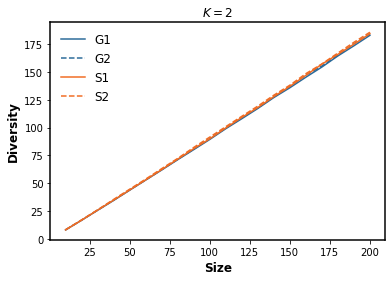

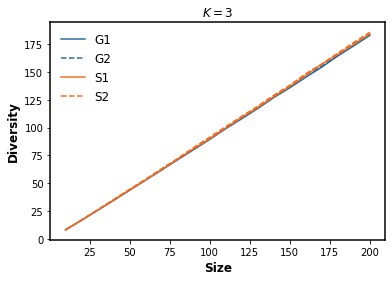

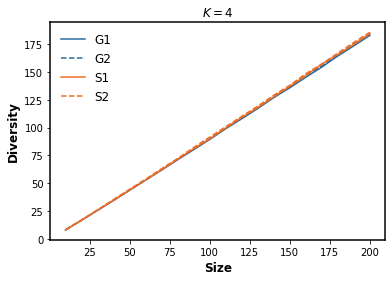

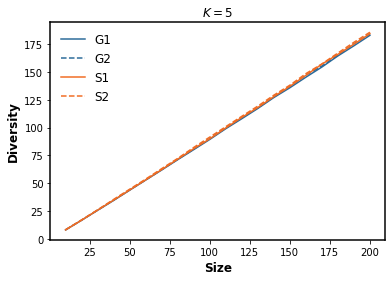

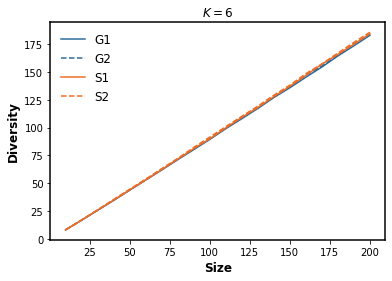

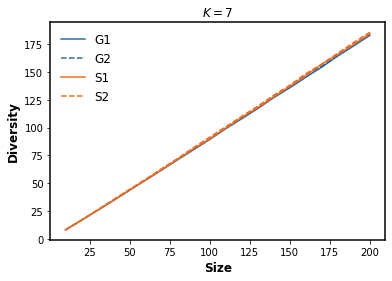

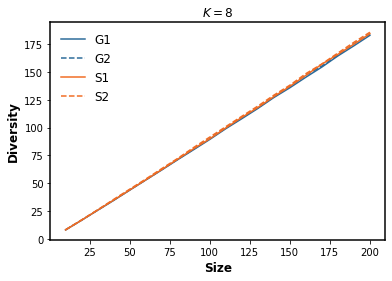

In [14]:
# GS Best Fitness Given the Same K and Varying Agent Numbers
for index in range(9):
    g1_diversity_across_size, g2_diversity_across_size = [], []
    for g1_diversity, g2_diversity in zip(gg_diversity_across_K_size, sg_diversity_across_K_size):
        g1_diversity_across_size.append(g1_diversity[index])
        g2_diversity_across_size.append(g2_diversity[index])
    
    s1_diversity_across_size, s2_diversity_across_size = [], []
    for s1_diversity, s2_diversity in zip(ss_diversity_across_K_size, gs_diversity_across_K_size):
        s1_diversity_across_size.append(s1_diversity[index])
        s2_diversity_across_size.append(s2_diversity[index])
        
    # g_baseline_across_size, s_baseline_across_size = [], []
    # for g_fitness, s_fitness in zip(g_best_fitness_across_K_size, s_best_fitness_across_K_size):
    #     g_baseline_across_size.append(g_fitness[index])
    #     s_baseline_across_size.append(s_fitness[index])
    
    g1_diversity_across_size = [a * b for a, b in zip(agent_num_list, g1_fitness_across_size)]
    g2_diversity_across_size = [a * b for a, b in zip(agent_num_list, g2_fitness_across_size)]
    s1_diversity_across_size = [a * b for a, b in zip(agent_num_list, s1_fitness_across_size)]
    s2_diversity_across_size = [a * b for a, b in zip(agent_num_list, s2_fitness_across_size)]
    
    x = agent_num_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g1_diversity_across_size, "-", label="G1", color=nature_blue)
    plt.plot(x, g2_diversity_across_size, "--", label="G2", color=nature_blue)
    # plt.plot(x, g_baseline_across_size, ":", label="G", color=nature_blue)
    
    
    plt.plot(x, s1_diversity_across_size, "-", label="S1", color=nature_orange)
    plt.plot(x, s2_diversity_across_size, "--", label="S2", color=nature_orange)
    # plt.plot(x, s_baseline_across_size, ":", label="S", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Diversity', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_diversity_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()